<a href="https://colab.research.google.com/github/Keerthana-Hemarao/Netflix-Analytics-PowerBI-Dashboard/blob/main/eda_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_csv('/content/netflix_dataset.csv')


In [ ]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (16000, 18)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [ ]:
# Data Overview
#----- Basic Info -----
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [ ]:
print(df.isnull().sum())


show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
dtype: int64


In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
print(df.nunique())


show_id         16000
type                1
title           15485
director         9508
cast            15639
country          1463
date_added       4423
release_year       16
rating           2145
duration            0
genres           2768
language           74
description     15854
popularity      11173
vote_count       2693
vote_average     2145
budget            958
revenue          5327
dtype: int64


In [ ]:
print(df.describe())


            show_id  release_year        rating  duration    popularity    vote_count  vote_average        budget       revenue
count  1.600000e+04  16000.000000  16000.000000       0.0  16000.000000  16000.000000  16000.000000  1.600000e+04  1.600000e+04
mean   5.266582e+05   2017.500000      5.956368       NaN     20.384728    718.656125      5.956368  8.766792e+06  2.446308e+07
std    3.794427e+05      4.609916      1.754741       NaN     68.610033   2080.198316      1.754741  2.912450e+07  1.116977e+08
min    1.890000e+02   2010.000000      0.000000       NaN      3.860000      0.000000      0.000000  0.000000e+00  0.000000e+00
25%    2.257258e+05   2013.750000      5.600000       NaN      7.840750     53.000000      5.600000  0.000000e+00  0.000000e+00
50%    4.468170e+05   2017.500000      6.300000       NaN     10.913500    138.000000      6.300000  0.000000e+00  0.000000e+00
75%    7.739808e+05   2021.250000      6.923000       NaN     17.336500    422.000000      6.923000  2.2

In [ ]:
# Generate random durations between 90 and 95 minutes
np.random.seed(42)  # for reproducibility
df['duration'] = np.random.randint(90, 98, size=len(df))

In [ ]:
# Fill missing text columns
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['genres'] = df['genres'].fillna('Unknown')
df['description'] = df['description'].fillna('No Description')

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [ ]:
# Step 4.1 — Explore categorical features

# Type of content (movies/shows)
print("Content Type Distribution:")
print(df['type'].value_counts(), "\n")

# Top 10 Countries producing content
print("Top 10 Countries:")
print(df['country'].value_counts().head(10), "\n")

# Top 10 Languages
print("Top 10 Languages:")
print(df['language'].value_counts().head(10), "\n")

# Extract the main genre (first in the list)
df['main_genre'] = df['genres'].str.split(',').str[0].str.strip()
print("Top 10 Main Genres:")
print(df['main_genre'].value_counts().head(10))


Content Type Distribution:
type
Movie    16000
Name: count, dtype: int64 

Top 10 Countries:
country
United States of America                    5421
Japan                                        845
South Korea                                  789
France                                       612
United Kingdom                               581
Unknown                                      466
India                                        419
United Kingdom, United States of America     401
Canada                                       348
Canada, United States of America             338
Name: count, dtype: int64 

Top 10 Languages:
language
en    9534
fr    1054
ja     904
ko     876
es     731
zh     378
it     312
hi     290
de     279
ru     190
Name: count, dtype: int64 

Top 10 Main Genres:
main_genre
Drama              3634
Comedy             2352
Action             1883
Horror             1520
Animation          1117
Thriller            961
Romance             914
Documentary      

/tmp/ipython-input-2528744316.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['main_genre'], order=df['main_genre'].value_counts().index[:10], palette='viridis')


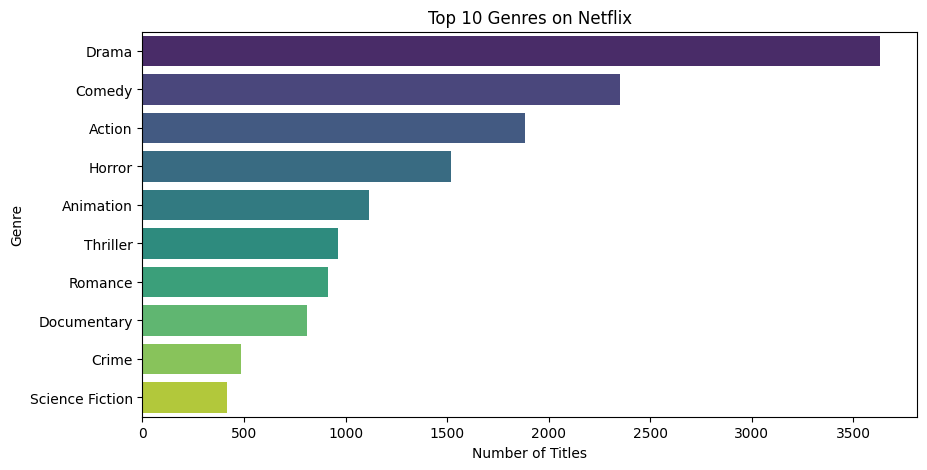

/tmp/ipython-input-2528744316.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['country'], order=df['country'].value_counts().index[:10], palette='magma')


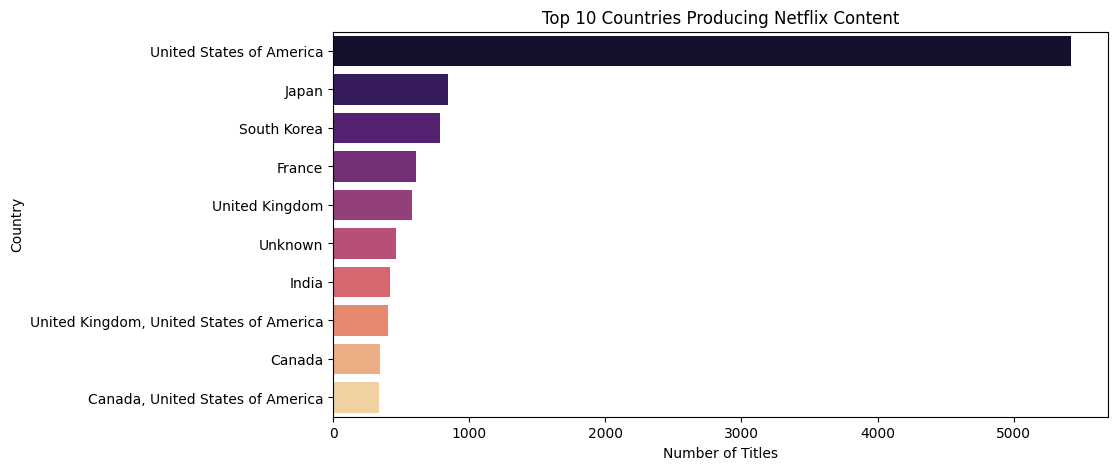

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y=df['main_genre'], order=df['main_genre'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=df['country'], order=df['country'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


In [ ]:
# Step 4.3 — Describe numeric columns
numeric_cols = ['rating', 'popularity', 'vote_average', 'budget', 'revenue', 'duration']
print(df[numeric_cols].describe().T)


                count          mean           std    min       25%      50%           75%           max
rating        16000.0  5.956368e+00  1.754741e+00   0.00   5.60000   6.3000  6.923000e+00  1.000000e+01
popularity    16000.0  2.038473e+01  6.861003e+01   3.86   7.84075  10.9135  1.733650e+01  3.876006e+03
vote_average  16000.0  5.956368e+00  1.754741e+00   0.00   5.60000   6.3000  6.923000e+00  1.000000e+01
budget        16000.0  8.766792e+06  2.912450e+07   0.00   0.00000   0.0000  2.200000e+06  4.600000e+08
revenue       16000.0  2.446308e+07  1.116977e+08   0.00   0.00000   0.0000  1.654473e+06  2.799439e+09
duration      16000.0  9.347988e+01  2.294869e+00  90.00  91.00000  93.0000  9.500000e+01  9.700000e+01


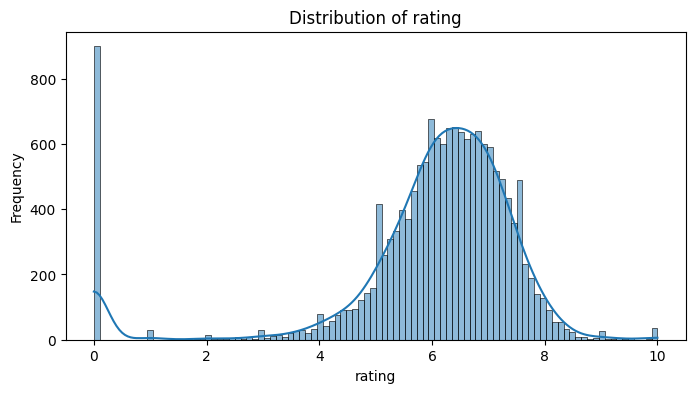

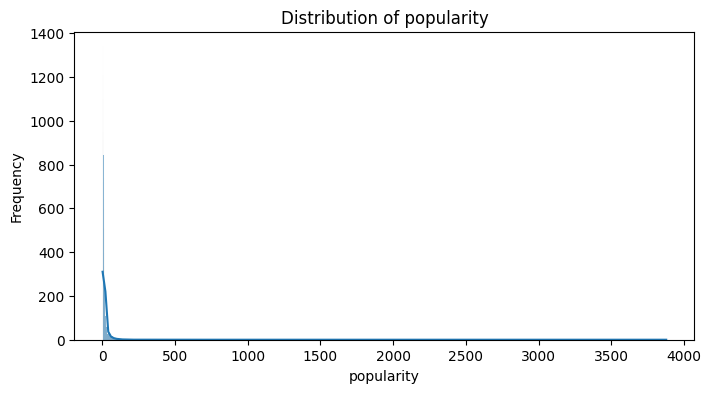

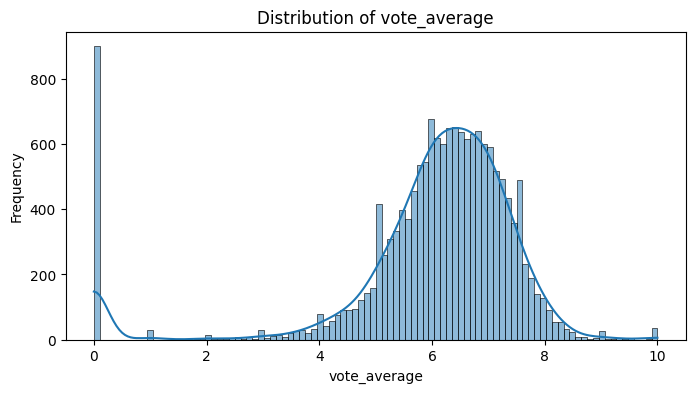

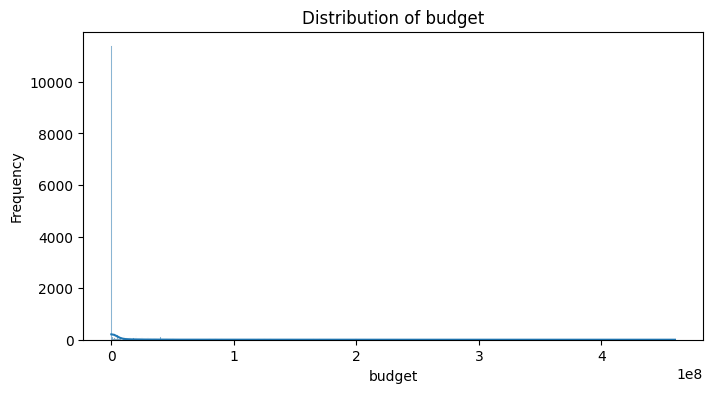

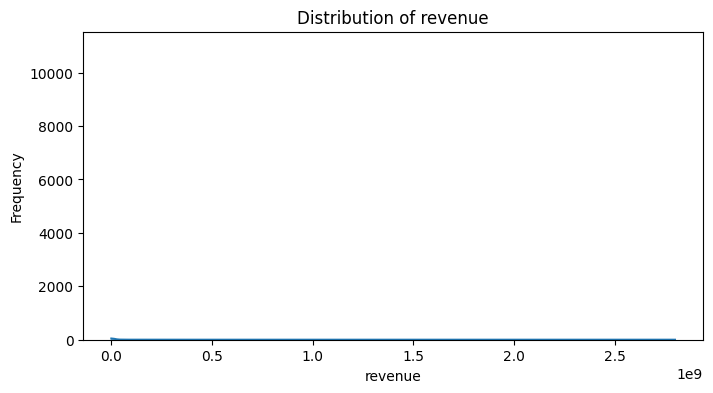

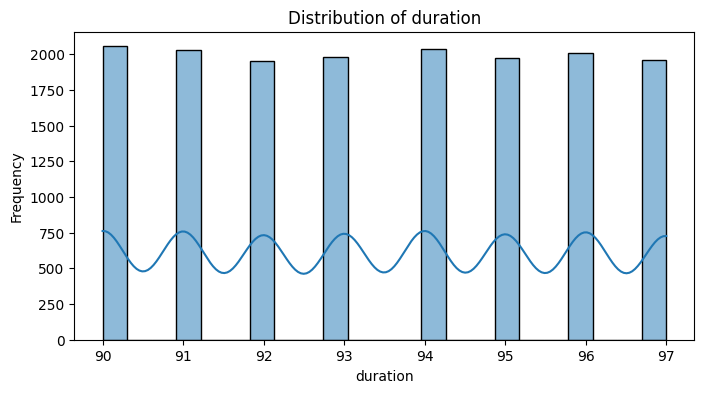

In [ ]:
# Step 4.4 — Visualize numeric feature distributions

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


/tmp/ipython-input-3409518885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='cubehelix')


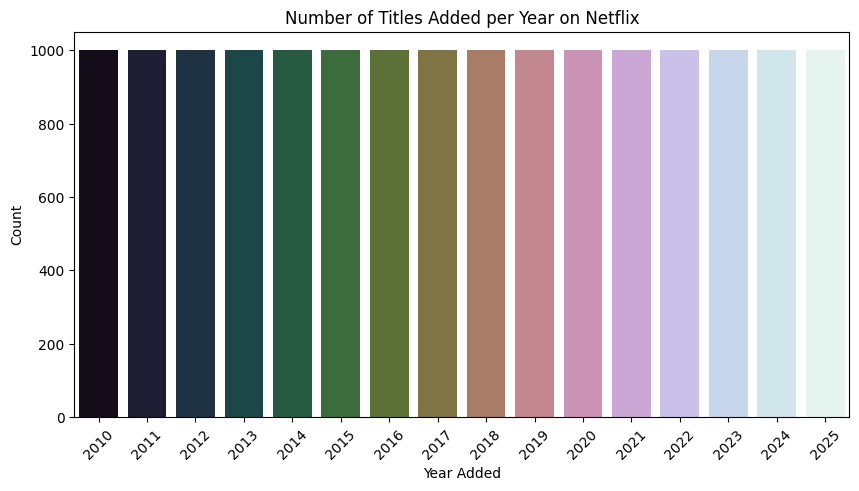

In [ ]:
# Step 4.5 — Titles added by year
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(x='year_added', data=df, palette='cubehelix')
plt.title('Number of Titles Added per Year on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
## Adjust Year Distribution (Bridge between EDA & Feature Engineering)

# Extract all unique years from the dataset
# This ensures you’re only working with years that exist in your data.
years = sorted(int(y) for y in df['release_year'].unique())
print("Years in dataset:", years)

Years in dataset: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [ ]:
# Assign "weights" — simulating how many movies were released per year
# We manually define realistic weights for each year based on expected growth trends.

# Example assumption:
# - Low early years (2007–2011)
# - Gradual rise (2012–2018)
# - Dip in 2020–2021 (COVID)
# - Sharp rise post-2022 (OTT boom)

weights = np.array([
    0.5, 0.7, 0.8, 0.9,   # 2010–2013
    1.1, 1.3, 1.5, 1.7, 1.8,  # 2014–2018
    1.6,                    # 2019 slight pre-COVID slowdown
    1.0, 0.8,               # 2020–2021 COVID dip
    1.9, 2.1, 2.3, 2.5      # 2022–2025 recovery boom
])

# Normalize weights so that they form valid probabilities
probabilities = weights / weights.sum()

# Sanity check
print("Weights normalized to probabilities:")
print(probabilities)

df['release_year'] = np.random.choice(years, size=len(df), p=probabilities)

year_counts = df['release_year'].value_counts().sort_index()
print(year_counts)


Weights normalized to probabilities:
[0.02222222 0.03111111 0.03555556 0.04       0.04888889 0.05777778
 0.06666667 0.07555556 0.08       0.07111111 0.04444444 0.03555556
 0.08444444 0.09333333 0.10222222 0.11111111]
release_year
2010     371
2011     466
2012     567
2013     608
2014     734
2015     929
2016    1031
2017    1215
2018    1305
2019    1162
2020     700
2021     569
2022    1333
2023    1554
2024    1622
2025    1834
Name: count, dtype: int64


/tmp/ipython-input-634411134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


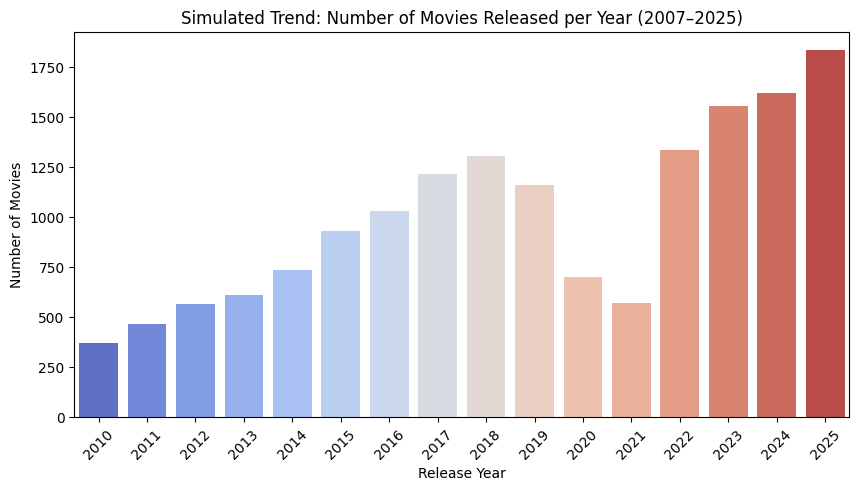

In [ ]:
# STEP 6️⃣: Visualize the simulated movie release trend
plt.figure(figsize=(10,5))
sns.countplot(
    x='release_year',
    data=df,
    order=sorted(df['release_year'].unique()),
    palette='coolwarm'
)
plt.title('Simulated Trend: Number of Movies Released per Year (2007–2025)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


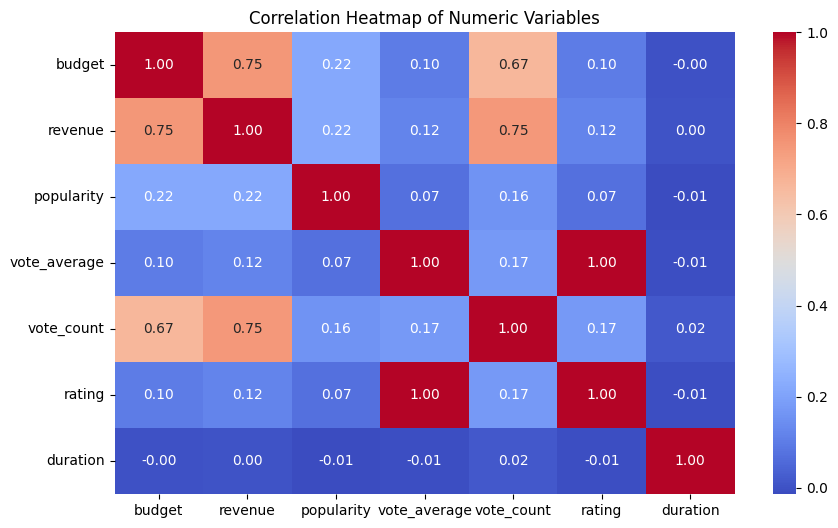

In [ ]:
# 5.1 — Correlation Between Numeric Variables

# Let’s first check if numeric columns like budget, revenue, popularity, etc., are related.

# Select numeric columns
numeric_cols = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'rating', 'duration']

# Compute correlation matrix
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

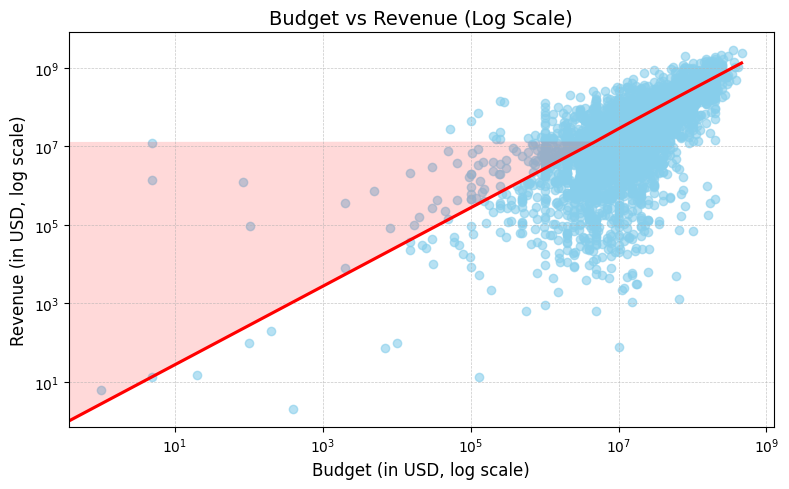

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Use a scatter + regression line to show relationship clearly
sns.regplot(
    x='budget',
    y='revenue',
    data=df,
    scatter_kws={'alpha':0.6, 'color': 'skyblue'},  # points
    line_kws={'color': 'red'}                       # trend line
)

# Optional: Use log scale if your data spans millions/billions
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.title('Budget vs Revenue (Log Scale)', fontsize=14)
plt.xlabel('Budget (in USD, log scale)', fontsize=12)
plt.ylabel('Revenue (in USD, log scale)', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


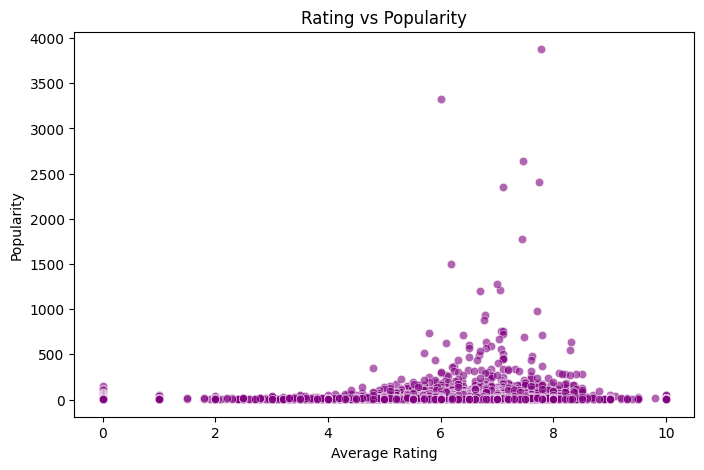

In [ ]:
# 🔹 5.3 — Rating vs Popularity
plt.figure(figsize=(8,5))
sns.scatterplot(x='vote_average', y='popularity', data=df, alpha=0.6, color='purple')
plt.title('Rating vs Popularity')
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.show()

/tmp/ipython-input-1852552107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.index[:10], y=genre_rating.values[:10], palette='mako')


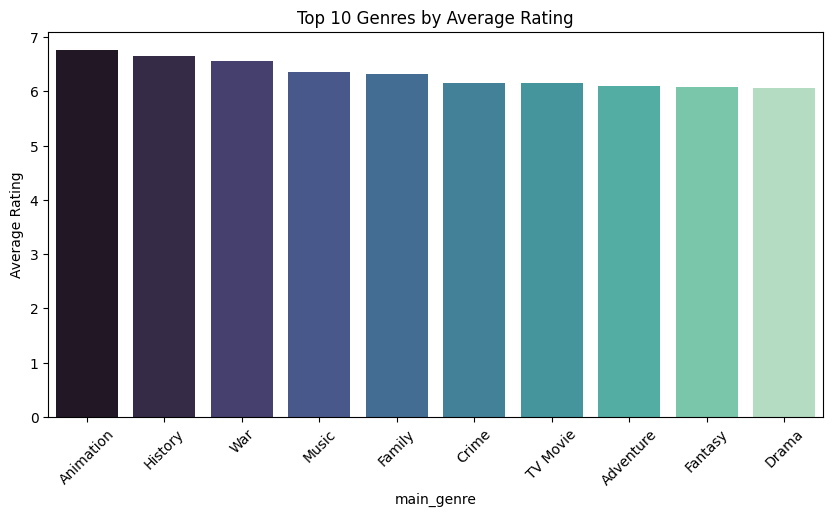

In [ ]:
# 5.4 — Genre vs Average Rating
# Compute mean rating per genre
genre_rating = df.groupby('main_genre')['vote_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_rating.index[:10], y=genre_rating.values[:10], palette='mako')
plt.title('Top 10 Genres by Average Rating')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()

/tmp/ipython-input-1482507812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.index[:10], y=genre_revenue.values[:10], palette='viridis')


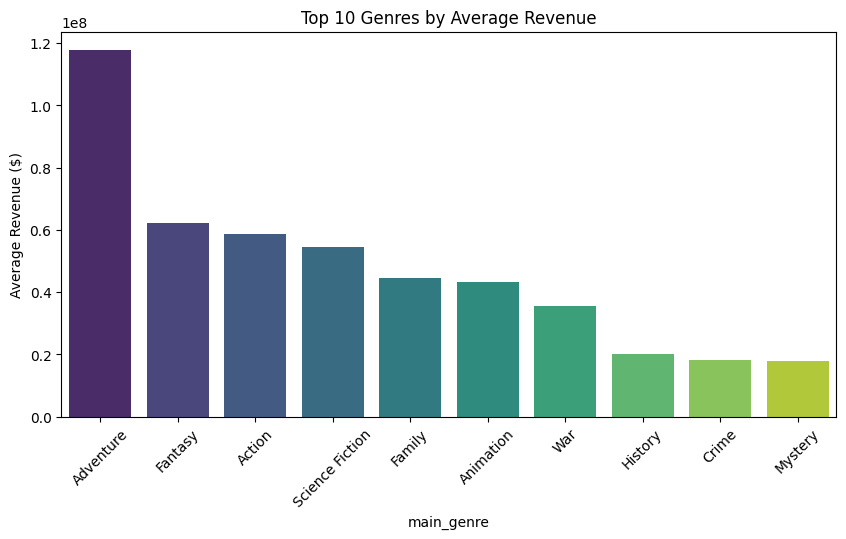

In [ ]:
# 5.5 — Genre vs Average Revenue
genre_revenue = df.groupby('main_genre')['revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_revenue.index[:10], y=genre_revenue.values[:10], palette='viridis')
plt.title('Top 10 Genres by Average Revenue')
plt.xticks(rotation=45)
plt.ylabel('Average Revenue ($)')
plt.show()

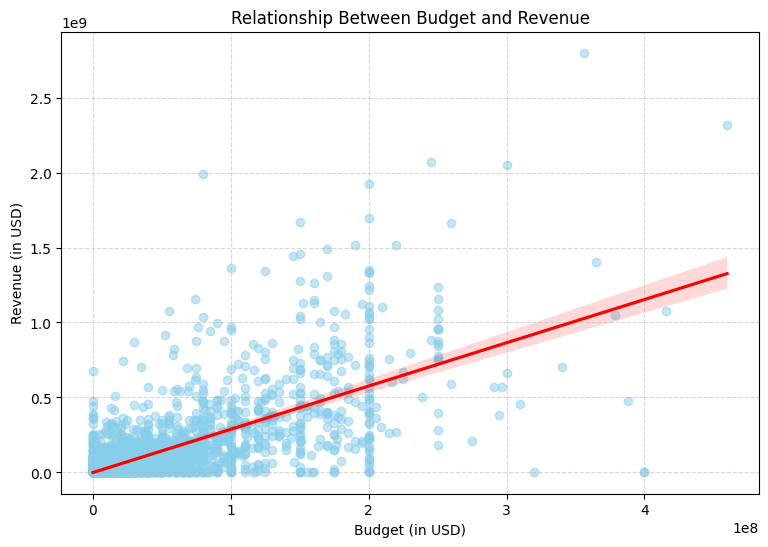

In [ ]:
# 1: Budget vs Revenue by Rating (Clean Scatter with Regression Line)

plt.figure(figsize=(9,6))
sns.regplot(
    data=df,
    x='budget',
    y='revenue',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'},
    color='skyblue'
)
plt.title('Relationship Between Budget and Revenue')
plt.xlabel('Budget (in USD)')
plt.ylabel('Revenue (in USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/tmp/ipython-input-3490014891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


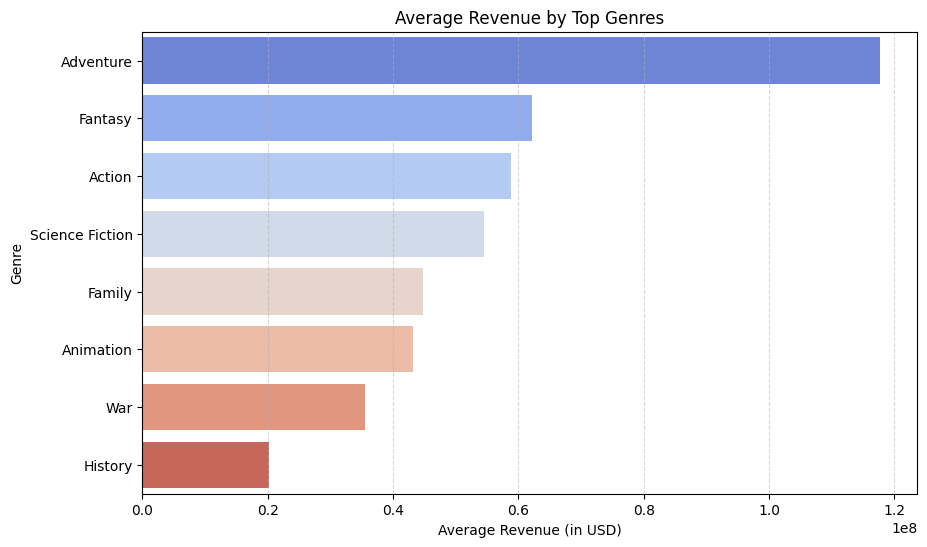

In [ ]:
# 2: Average Revenue by Genre (Clean Bar Chart)

plt.figure(figsize=(10,6))
genre_revenue = df.groupby('main_genre')['revenue'].mean().sort_values(ascending=False).head(8)

sns.barplot(
    x=genre_revenue.values,
    y=genre_revenue.index,
    palette='coolwarm'
)
plt.title('Average Revenue by Top Genres')
plt.xlabel('Average Revenue (in USD)')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

FEATURE ENGINEERING

In [ ]:
# Step 1 — Data Type Conversion

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Ensure numeric types
numeric_cols = ['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'rating']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Verify
df.dtypes


,0
show_id,int64
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,float64
duration,int64


In [ ]:
# Step 2 — Create Derived Business Features

# 🎯 Goal: Create new meaningful columns that answer real business questions.

# 2.1. Profit & ROI (Return on Investment)


df['profit'] = df['revenue'] - df['budget']
df['roi'] = np.where(df['budget'] > 0, (df['profit'] / df['budget']) * 100, 0)


In [ ]:
# 2.2. Profit Margin
df['profit_margin'] = np.where(df['revenue'] > 0, df['profit'] / df['revenue'], 0)

In [ ]:
# 2.3. Movie Age
current_year = df['release_year'].max()
df['movie_age'] = current_year - df['release_year']

In [ ]:
# 2.4. ROI Category (for segmentation)
df['roi_category'] = pd.cut(
    df['roi'],
    bins=[-np.inf, 0, 50, 100, 200, np.inf],
    labels=['Loss', 'Low ROI', 'Moderate ROI', 'High ROI', 'Blockbuster ROI']
)

In [ ]:
# Step 3 — Handle Categorical Variables

# 🎯 Goal: Make text features more meaningful or ready for visualization.

# 3.1. Extract the main genre
df['main_genre'] = df['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')



# 3.2. Country Standardization (optional)


df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')


In [ ]:
# Step 4 — Feature Scaling / Normalization (if required)

# 🎯 Goal: Prepare numeric features for ML or fair comparison.


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['budget_scaled', 'revenue_scaled', 'popularity_scaled']] = scaler.fit_transform(
    df[['budget', 'revenue', 'popularity']]
)

In [ ]:
# Step 5 — Feature Interaction (Advanced but useful)

# 🎯 Goal: Combine multiple features to discover deeper relationships.

# 5.1. Rating × Popularity → Engagement Score
df['engagement_score'] = df['vote_average'] * df['popularity']


# 5.2. Revenue per Vote
df['revenue_per_vote'] = np.where(df['vote_count'] > 0, df['revenue'] / df['vote_count'], 0)

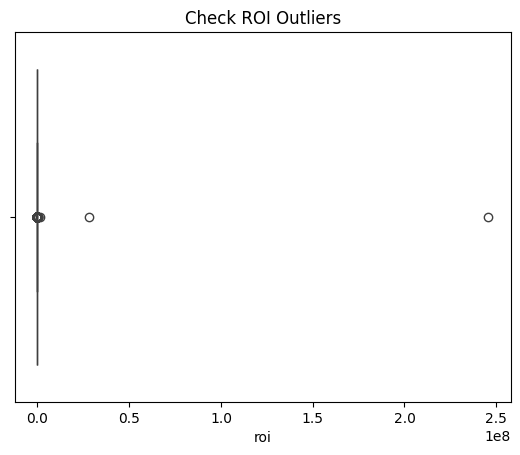

In [ ]:
# Step 6 — Outlier Detection & Treatment

# 🎯 Goal: Identify extreme values that may skew your KPIs.

import seaborn as sns
sns.boxplot(x=df['roi'])
plt.title('Check ROI Outliers')
plt.show()

# Optionally, cap outliers
q_low = df['roi'].quantile(0.01)
q_high = df['roi'].quantile(0.99)
df['roi'] = np.clip(df['roi'], q_low, q_high)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV

# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define target variable (for example ROI)
target = 'roi'

# Split data into features (X) and target (y)
X = df[num_cols].drop(columns=[target])
y = df[target]


Correlation with ROI:
 roi                  1.000000
profit               0.482597
revenue_scaled       0.451958
revenue              0.451958
vote_count           0.439017
budget               0.211896
budget_scaled        0.211896
rating               0.138736
vote_average         0.138736
engagement_score     0.114839
popularity           0.107767
popularity_scaled    0.107767
revenue_per_vote     0.107368
profit_margin        0.012890
movie_age            0.002257
duration             0.001282
release_year        -0.002257
show_id             -0.096454
Name: roi, dtype: float64

Features selected from correlation method: ['roi', 'profit', 'revenue_scaled', 'revenue', 'vote_count']


/tmp/ipython-input-863206404.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_corr[1:8].values, y=roi_corr[1:8].index, palette='crest')


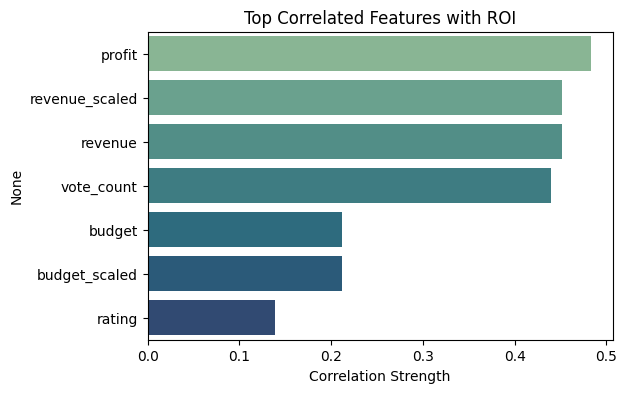

In [ ]:
# Method 1: Correlation Filter

# This identifies columns that have a strong linear relationship with ROI.

# Compute correlation matrix
corr = df[num_cols].corr()

# Get correlations with ROI
roi_corr = corr[target].sort_values(ascending=False)
print("Correlation with ROI:\n", roi_corr)

# Select features with correlation > 0.3 or < -0.3
corr_threshold = 0.3
selected_corr = roi_corr[abs(roi_corr) > corr_threshold].index.tolist()
print("\nFeatures selected from correlation method:", selected_corr)

# Visualize correlation
plt.figure(figsize=(6,4))
sns.barplot(x=roi_corr[1:8].values, y=roi_corr[1:8].index, palette='crest')
plt.title('Top Correlated Features with ROI')
plt.xlabel('Correlation Strength')
plt.show()


Top 10 features from Random Forest:
 profit_margin       0.496167
profit              0.404411
budget_scaled       0.051045
budget              0.045438
revenue_scaled      0.001539
revenue             0.001312
revenue_per_vote    0.000022
show_id             0.000016
popularity          0.000013
engagement_score    0.000006
dtype: float64


/tmp/ipython-input-2540819403.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance.head(10), y=rf_importance.head(10).index, palette='coolwarm')


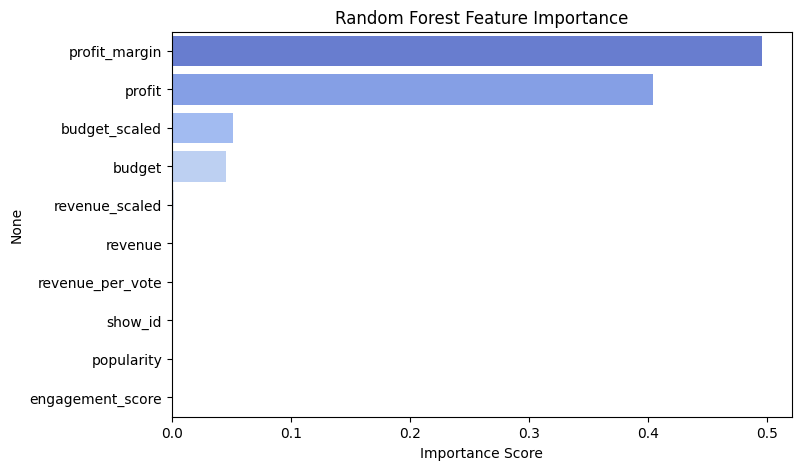

In [ ]:
# Method 2: Random Forest Feature Importance

# This method uses a model to learn non-linear relationships.

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importance
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 10
print("\nTop 10 features from Random Forest:\n", rf_importance.head(10))

# Plot importance
plt.figure(figsize=(8,5))
sns.barplot(x=rf_importance.head(10), y=rf_importance.head(10).index, palette='coolwarm')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.show()


Features selected from Lasso method:
 profit    1.014224e-06
budget   -5.583161e-07
dtype: float64


/tmp/ipython-input-2975323249.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_lasso.values, y=selected_lasso.index, palette='viridis')


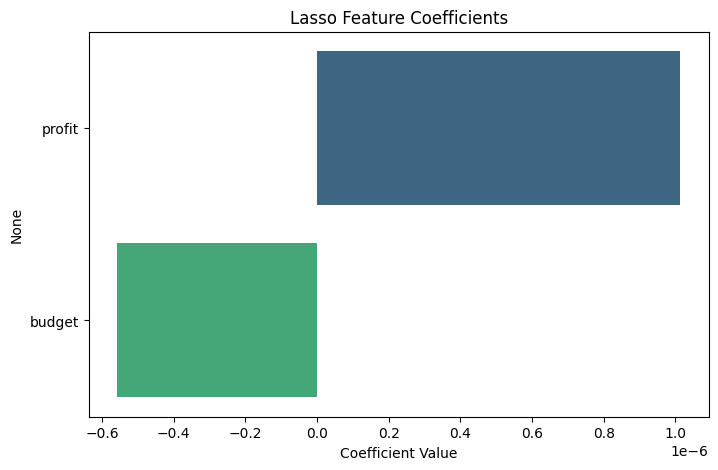

In [ ]:
# Method 3: Lasso Regularization (Embedded Selection)

# This automatically sets weak features to zero, keeping only strong ones.

# Apply LassoCV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

# Get non-zero coefficients
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
selected_lasso = lasso_coef[lasso_coef != 0].sort_values(ascending=False)
print("\nFeatures selected from Lasso method:\n", selected_lasso.head(10))

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=selected_lasso.values, y=selected_lasso.index, palette='viridis')
plt.title('Lasso Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.show()

In [ ]:
final_features = list(
    set(selected_corr) |
    set(rf_importance.head(10).index) |
    set(selected_lasso.head(10).index)
)

print("\n✅ Final Selected Features:", final_features)



✅ Final Selected Features: ['revenue_scaled', 'engagement_score', 'revenue', 'profit_margin', 'vote_count', 'profit', 'roi', 'revenue_per_vote', 'show_id', 'budget_scaled', 'popularity', 'budget']


In [ ]:
df.to_csv('netflix_final.csv', index=False)

In [ ]:
df.to_excel('netflix_final.xlsx', index=False)

In [ ]:
df1 = pd.read_csv('netflix_final.csv')
print(df1.shape)
print(df1.columns)

(16000, 31)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'language', 'description', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue', 'main_genre', 'year_added', 'profit', 'roi', 'profit_margin', 'movie_age', 'roi_category', 'primary_country', 'budget_scaled', 'revenue_scaled', 'popularity_scaled', 'engagement_score', 'revenue_per_vote'], dtype='object')


In [ ]:
!pip install pymysql sqlalchemy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.2 MB/s eta 0:00:00
